In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd

#styles: grayscale, seaborn-paper, seaborn-colorblind, ggplot, tableu-colorblind10
plt.style.use('seaborn-paper')
plt.rcParams['pdf.fonttype'] = 42

titanic [10, 9, 9, 7, 11] [48, 48, 48, 48, 48]
adult [2, 3, 2, 2, 2] [20, 17, 23, 18, 25]
msnbc [2, 2, 2, 2, 2] [13, 14, 12, 16, 13]
loans [4, 4, 4, 4, 4] [28, 28, 27, 27, 25]
stroke [29, 32, 30, 28, 24] [42, 42, 41, 42, 42]


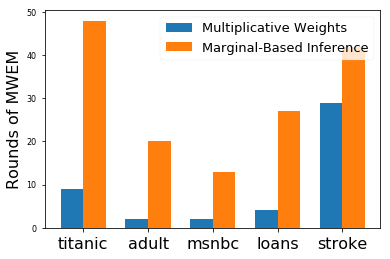

In [2]:
def plot_mwem():
    datasets = ['titanic', 'adult', 'msnbc', 'loans', 'stroke']
    mwem = []
    pgm = []
    for D in datasets:
        MW = glob.glob('results/mwem/slurm-2h/%s_MW*' % D)
        MB = glob.glob('results/mwem/slurm-2h/%s_MB*' % D)
        
        MW = [len(open(f).readlines()) for f in MW]
        MB = [len(open(f).readlines()) for f in MB]
        print(D, MW, MB)
        mwem.append(np.median(MW))
        pgm.append(np.median(MB))
        
    index = np.arange(len(datasets))
    plt.bar(index, mwem, 0.35, label='Multiplicative Weights')
    plt.bar(index+0.35, pgm, 0.35, label='Marginal-Based Inference')
    plt.xticks(index+0.35/2, datasets, fontsize=16)
    plt.legend(loc='upper right',fontsize=13)
    plt.ylabel('Rounds of MWEM', fontsize=16)

plot_mwem()
plt.savefig('mwem.pdf')

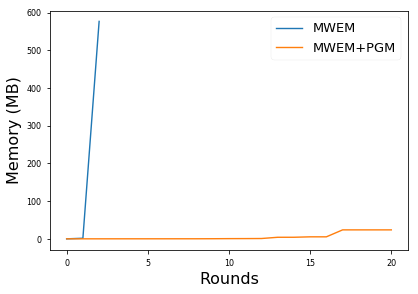

In [10]:
dataset = 'loans'
MW = sorted(glob.glob('results/mwem/slurm-new/adult_MW*'))
MB = sorted(glob.glob('results/mwem/slurm-new/adult_MB*'))

MW = 'results/mwem/slurm-new/adult_MW_2094276510.out'
MB = 'results/mwem/slurm-new/adult_MB_2094276510.out'

columns = ['measurement', 'memory', 'total_time', 'time_VE', 'time_EST', 'error']

mw = pd.read_csv(MW, names = columns)
mb = pd.read_csv(MB, names = columns)

plt.plot(mw.index, mw.memory, label='MWEM')
plt.plot(mb.index, mb.memory, label='MWEM+PGM')
plt.xticks([0,5,10,15,20])
plt.xlabel('Rounds', fontsize=16)
plt.ylabel('Memory (MB)', fontsize=16)
plt.legend(loc='upper right', fontsize=13)

In [3]:
def plot_privbayes():
    pb = []
    pgm = []
    
    datasets = ['titanic', 'adult', 'loans', 'stroke']
    
    cols = ['dataset', 'seed', 'pb_Q', 'mbi_Q', 'approx_Q', 'pb_W', 'mbi_W', 'approx_W']
    results = pd.read_csv('results/privbayes.csv', names=cols)
    
    pb = 0.5*results.groupby('dataset')['pb_W'].median()
    mbi = 0.5*results.groupby('dataset')['mbi_W'].median()
    
    print(mbi)
        
    index = np.arange(len(datasets))
    plt.bar(index, pb[datasets], 0.35, color='C3', label='PrivBayes')
    plt.bar(index+0.35, mbi[datasets], 0.35, color='C0', edgecolor='k', hatch='//', label='PrivBayes+PGM')
    #plt.bar(index+0.35, mbi[datasets], 0.35, color='None', edgecolor='k', hatch='//')
    plt.xticks(index+0.35/2, datasets, fontsize=22)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left',fontsize=22)
    plt.ylabel('Workload Error', fontsize=22)
    plt.ylim(0,2.5)

plot_privbayes()
plt.savefig('privbayes.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'results/privbayes.csv'

In [22]:
datasets = ['titanic', 'adult', 'loans', 'stroke']

cols = ['dataset', 'seed', 'epsilon', 'engine', 'error']
results = pd.read_csv('results/mwem.csv', names=cols)
results = results.loc[results.epsilon == 1.0]

mw = results.loc[results.engine == 'MW']
mb = results.loc[results.engine == 'MB']
cvx = results.loc[results.engine == 'CVX']
cvx = 0.5*cvx.groupby('dataset')['error'].median().reindex(datasets).fillna(0)
cvx

dataset
titanic    0.592464
adult      0.648406
loans      1.420599
stroke     1.776046
Name: error, dtype: float64

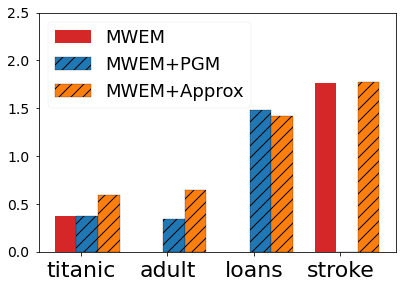

In [26]:
def plot_mwem2():
    hdmm = []
    pgm = []
    
    datasets = ['titanic', 'adult', 'loans', 'stroke']
    
    cols = ['dataset', 'seed', 'epsilon', 'engine', 'error']
    results = pd.read_csv('results/mwem.csv', names=cols)
    results = results.loc[results.epsilon == 1.0]
    
    mw = results.loc[results.engine == 'MW']
    mb = results.loc[results.engine == 'MB']
    cvx = results.loc[results.engine == 'CVX']
    
    mw = 0.5*mw.groupby('dataset')['error'].median().reindex(datasets).fillna(0)
    mb = 0.5*mb.groupby('dataset')['error'].median().reindex(datasets).fillna(0)
    cvx = 0.5*cvx.groupby('dataset')['error'].median().reindex(datasets).fillna(0)
        
    index = np.arange(len(datasets))
    plt.bar(index, mw[datasets], 0.25, color='C3', label='MWEM')
    plt.bar(index+0.25, mb[datasets], 0.25, color='C0', edgecolor='k', hatch='//', label='MWEM+PGM')
    plt.bar(index+0.5, cvx[datasets], 0.25, color='C1', edgecolor='k', hatch='//', label='MWEM+Approx')
    #plt.bar(index+0.35, mb[datasets], 0.35, color='None', edgecolor='k', hatch='//')
    plt.xticks(index+0.35/2, datasets, fontsize=22)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left',fontsize=18)
    #plt.ylabel('Workload Error', fontsize=22)
    plt.ylim(0,2.5)

plot_mwem2()
plt.savefig('mwem.pdf')

dataset
adult      0.079535
loans      0.087647
msnbc      0.023127
stroke     0.056011
titanic    0.292712
Name: mbi_W, dtype: float64


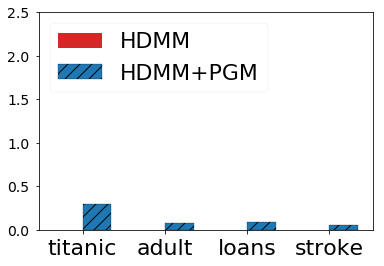

In [5]:
def plot_hdmm():
    hdmm = []
    pgm = []
    
    datasets = ['titanic', 'adult', 'loans', 'stroke']
    
    cols = ['dataset', 'seed', 'epsilon', 'hdmm_Q', 'mbi_Q', 'hdmm_W', 'mbi_W']
    results = pd.read_csv('results/hdmm.csv', names=cols)
    results = results[results.epsilon == 1.0]
    
    pb = 0.5*results.groupby('dataset')['hdmm_W'].median()
    mbi = 0.5*results.groupby('dataset')['mbi_W'].median()
    
    print(mbi)
        
    index = np.arange(len(datasets))
    #plt.bar(index, pb[datasets], 0.35, color='C3', label='HDMM+LLS')
    plt.bar(index, [0,0,0,0], 0.35, color='C3', label='HDMM')
    plt.bar(index+0.35, mbi[datasets], 0.35, color='C0', edgecolor='k', hatch='//', label='HDMM+PGM')
    #plt.bar(index+0.35, mbi[datasets], 0.35, color='None', edgecolor='k', hatch='//')
    plt.xticks(index+0.35/2, datasets, fontsize=22)
    plt.yticks(fontsize=14)
    plt.legend(loc='upper left',fontsize=22)
    #plt.ylabel('Workload Error', fontsize=22)
    plt.ylim(0,2.5)

plot_hdmm()
plt.savefig('hdmm.pdf')

In [27]:
def plot_dualquery():
    datasets = ['titanic', 'adult', 'loans', 'stroke']
    
    cols = ['dataset', 'seed', 'epsilon', 'dq_W', 'mbi_W', 'approx_W']
    results = pd.read_csv('results/dual_query.csv', names=cols)
    results = results[results.epsilon == 1.0]
    
    pb = 0.5*results.groupby('dataset')['dq_W'].median()
    mbi = 0.5*results.groupby('dataset')['mbi_W'].median()
    approx = 0.5*results.groupby('dataset')['approx_W'].median()
    print(mbi)
        
    index = np.arange(len(datasets))
    plt.bar(index, pb[datasets], 0.35, color='C3', label='DualQuery')
    plt.bar(index+0.35, mbi[datasets], 0.35, color='C0', edgecolor='k', hatch='//', label='DualQuery+PGM')
    #plt.bar(index+0.35, mbi[datasets], 0.35, color='C0', edgecolor='k', hatch='//', label='DualQuery+PGM')
    #plt.bar(index+0.35, mbi[datasets], 0.35, color='None', edgecolor='k', hatch='//')
    plt.xticks(index+0.35/2, datasets, fontsize=22)
    plt.legend(loc='upper left',fontsize=22)
    #plt.ylabel('Workload Error', fontsize=22)
    plt.yticks(fontsize=14)
    plt.ylim(0,2.5)

plot_dualquery()
plt.savefig('dualquery.pdf')

DataError: No numeric types to aggregate

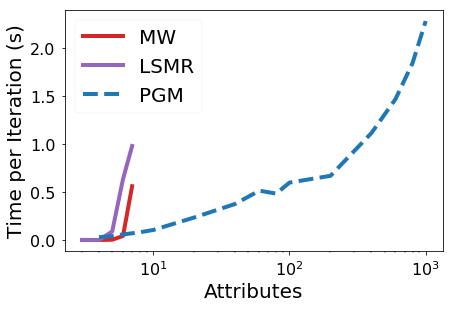

In [15]:
df = pd.read_csv('results/scalability.csv', names=['columns','values','cliques','engine','iters','time'])
df = df.sort_values(by='columns')
df['t'] = df.time / df.iters

MW = df[df.engine == 'MW']
LS = df[df.engine == 'LS']
MB = df[df.engine == 'MB']

plt.plot(MW['columns'], MW['t'], color='C3', label='MW', linewidth=4)
plt.plot(LS['columns'], LS['t'], color='#9467bd', label='LSMR', linewidth=4)
plt.plot(MB['columns'], MB['t'], '--', color='C0', label='PGM', linewidth=4)

plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attributes', fontsize=20)
plt.ylabel('Time per Iteration (s)', fontsize=20)
plt.xscale('log')
plt.tight_layout()
plt.savefig('scalability.pdf')

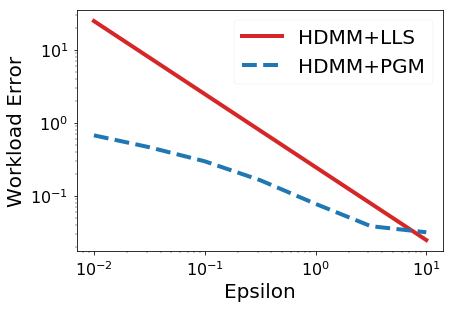

In [16]:
df = pd.read_csv('results/sensitivity.csv', names=['dataset', 'seed', 'epsilon', 'hdmm_Q', 'pgm_Q', 'hdmm_W', 'pgm_W', 'pgm_Q2', 'pgm_W2'])
hdmm = df.groupby('epsilon')['hdmm_W'].median()
pgm = df.groupby('epsilon')['pgm_W'].median()
#pgm2 = df.groupby('epsilon')['pgm_W2'].median()
plt.plot(hdmm.index, 0.5*hdmm.values, color='C3', label='HDMM+LLS', linewidth=4)
plt.plot(pgm.index, 0.5*pgm.values, '--', color='C0', label='HDMM+PGM', linewidth=4)
#plt.plot(pgm2.index, 0.5*pgm2.values, '--', label='HDMM+PGM2', linewidth=4)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Epsilon', fontsize=20)
plt.ylabel('Workload Error', fontsize=20)
plt.loglog()
plt.tight_layout()
plt.savefig('sensitivity.pdf')


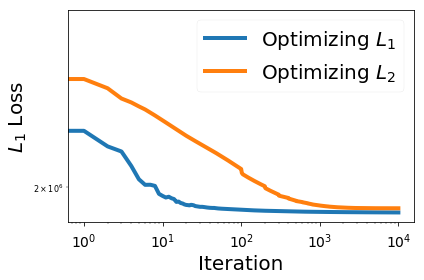

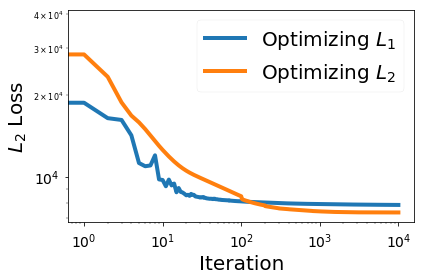

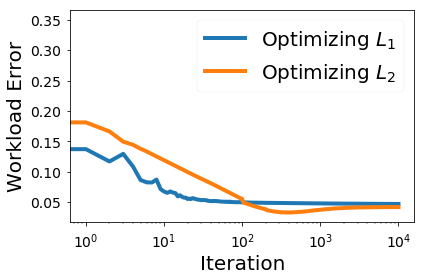

In [52]:
L1 = pd.read_csv('results/L1.csv', index_col=0)
L2 = pd.read_csv('results/L2.csv', index_col=0)

fig = plt.figure()
plt.plot(L1.index, L1.l1_loss, label='Optimizing $L_1$', linewidth=4)
plt.plot(L2.index, L2.l1_loss, label='Optimizing $L_2$', linewidth=4)
plt.loglog()
plt.ylabel('$L_1$ Loss', fontsize=20)
plt.xlabel('Iteration', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('l1_vs_l2a.pdf')

fig = plt.figure()
plt.plot(L1.index, np.sqrt(L1.l2_loss), label='Optimizing $L_1$', linewidth=4)
plt.plot(L2.index, np.sqrt(L2.l2_loss), label='Optimizing $L_2$', linewidth=4)
plt.loglog()
plt.ylabel('$L_2$ Loss', fontsize=20)
plt.xlabel('Iteration', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('l1_vs_l2b.pdf')

fig = plt.figure()
plt.plot(L1.index, 0.5*L1.variation, label='Optimizing $L_1$', linewidth=4)
plt.plot(L2.index, 0.5*L2.variation, label='Optimizing $L_2$', linewidth=4)
plt.ylabel('Workload Error', fontsize=20)
plt.xlabel('Iteration', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.xscale('log')
plt.tight_layout()
plt.savefig('l1_vs_l2c.pdf')